# Introduction 

In the following notebook, I will creating a time series forecast aiming to predict the temperature in Spain. 

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)
* Training and test data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/03_Processed_Data)

**Read in libraries for notebook**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set notebook preferences**

In [2]:
#Set preferences for pandas 
pd.set_option("display.max_rows", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [3]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather/Data/03_Processed_Data'

#Read in Bilbao training and test data
train = pd.read_csv(path + '/2020_0515_temp_train.csv', parse_dates=['date_time'], index_col='date_time')
test = pd.read_csv(path + '/2020_0515_temp_test.csv', parse_dates=['date_time'], index_col='date_time')

**Data preview**

In [4]:
display(train.head())

,temp,date,time,weekday,month,year,temp_deseasoned1,temp_24hr_smooth,temp_weekly_smooth,deseasoned_24hr_smooth,deseasoned_weekly_smooth
date_time,,,,,,,,,,,
2015-01-05 23:00:00,39.085464,2015-01-05,23:00:00,Monday,January,2015,1.111927,42.589256,41.560608,-1.074800,0.946834
2015-01-06 00:00:00,37.943116,2015-01-06,00:00:00,Tuesday,January,2015,0.597544,42.614153,41.530712,-1.073884,0.943233
2015-01-06 01:00:00,37.841360,2015-01-06,01:00:00,Tuesday,January,2015,0.757260,42.645706,41.500471,-1.037944,0.941335
2015-01-06 02:00:00,36.558928,2015-01-06,02:00:00,Tuesday,January,2015,0.111611,42.650356,41.460296,-1.017884,0.932954
2015-01-06 03:00:00,36.595524,2015-01-06,03:00:00,Tuesday,January,2015,0.999000,42.691981,41.421064,-0.920989,0.933614


In [5]:
print(train.shape)
display(train.head())

(27962, 11)


,temp,date,time,weekday,month,year,temp_deseasoned1,temp_24hr_smooth,temp_weekly_smooth,deseasoned_24hr_smooth,deseasoned_weekly_smooth
date_time,,,,,,,,,,,
2015-01-05 23:00:00,39.085464,2015-01-05,23:00:00,Monday,January,2015,1.111927,42.589256,41.560608,-1.074800,0.946834
2015-01-06 00:00:00,37.943116,2015-01-06,00:00:00,Tuesday,January,2015,0.597544,42.614153,41.530712,-1.073884,0.943233
2015-01-06 01:00:00,37.841360,2015-01-06,01:00:00,Tuesday,January,2015,0.757260,42.645706,41.500471,-1.037944,0.941335
2015-01-06 02:00:00,36.558928,2015-01-06,02:00:00,Tuesday,January,2015,0.111611,42.650356,41.460296,-1.017884,0.932954
2015-01-06 03:00:00,36.595524,2015-01-06,03:00:00,Tuesday,January,2015,0.999000,42.691981,41.421064,-0.920989,0.933614


# PNG files with time plots

# PNG file with autocorrelations

# Forecasting 

**Data preparation

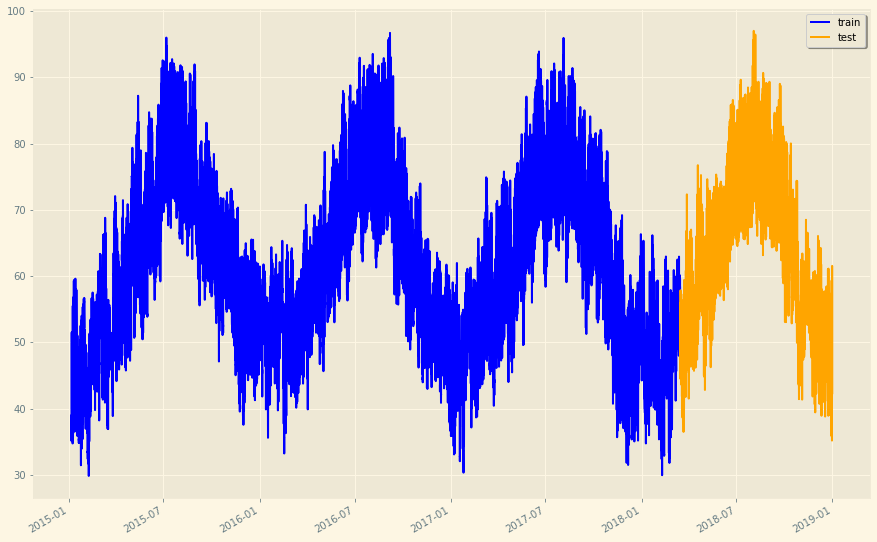

In [6]:
from TimeseriesPlotter import timeseries_plot

#Set figure
f, ax = plt.subplots(figsize = (15,10))

#Plot training and test data
timeseries_plot(train.temp, color = 'blue', ax=ax, label = 'train')
timeseries_plot(test.temp, color = 'orange', ax = ax, legend = True,label = 'test')


## Base model

Triple Exponential Smoothing w/ Raw Temp Data

In [7]:
#Import holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Fit model to training data
hw = ExponentialSmoothing(train.temp.values, seasonal='add',seasonal_periods=24 * 7 *52 ).fit()
pred = hw.forecast(len(test))

In [8]:
#Import model_performance
from TimeSeriesStats import model_performance
results = model_performance(pred, test.temp.values)

In [9]:
print(results)

{'MSE': 223.01641853170335, 'RMSE': 14.933734246051902, 'MAE': 11.961578370332605}


Text(0.5, 0.9, 'RMSE:14.9337')

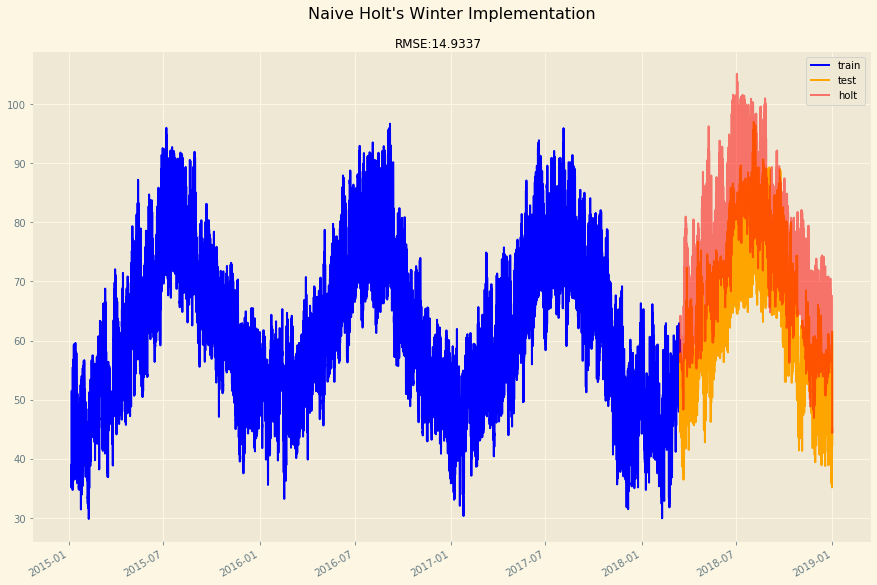

In [10]:
#Import model_performance
from TimeSeriesStats import model_performance

#Set figure
f, ax = plt.subplots(figsize = (15,10))

#Plot training and test data
timeseries_plot(train.temp, color = 'blue', ax=ax, label = 'train')
timeseries_plot(test.temp, color = 'orange', ax = ax, legend = True,label = 'test')
ax.plot(test.index, pred, color = 'r',alpha = .5, label = 'holt')
ax.legend()
ax.set_title('Naive Holt\'s Winter Implementation', pad = 33)
f.suptitle('RMSE:{}'.format(round(results['RMSE'],4)), y=.9)

# Holt's Winter with Averaged Temperature Data - 24hrs

In [11]:
hw2 = ExponentialSmoothing(train.temp_24hr_smooth.values, seasonal='add', seasonal_periods=24*7*52).fit()
pred2 = hw2.forecast(len(test))

#Scores
results = model_performance(pred2, test.temp_24hr_smooth)

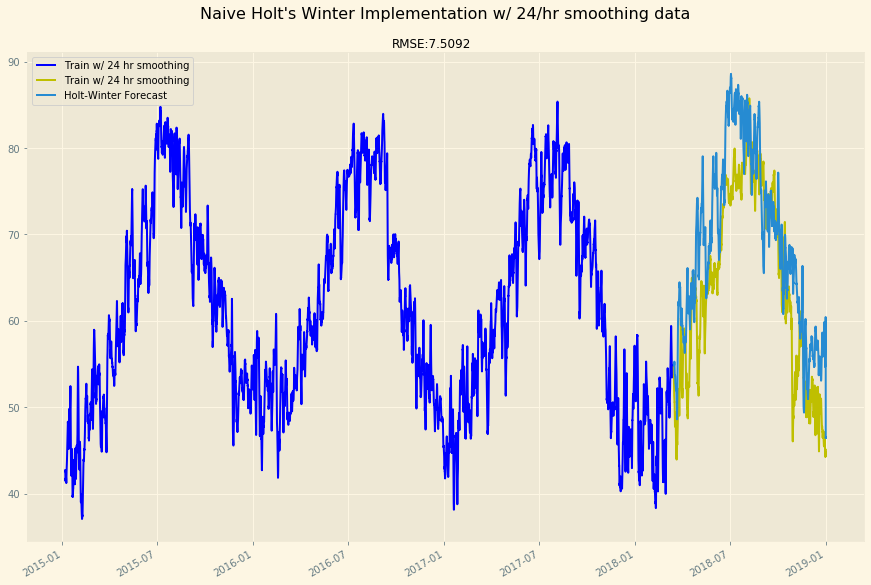

In [12]:
#Set figure
f, ax = plt.subplots(figsize = (15,10))

#Plot data
timeseries_plot(train.temp_24hr_smooth, ax = ax, color = 'b', label = 'Train w/ 24 hr smoothing')
timeseries_plot(test.temp_24hr_smooth, ax = ax, color = 'y', label = 'Train w/ 24 hr smoothing')
ax.plot(test.index,pred2, label = 'Holt-Winter Forecast')
ax.set_title('Naive Holt\'s Winter Implementation w/ 24/hr smoothing data', pad = 33)
f.suptitle('RMSE:{}'.format(round(results['RMSE'],4)), y=.9)
ax.legend()

Holt Winter with deaseasoned data

In [13]:
hw = ExponentialSmoothing(train.temp_deseasoned1.values, seasonal = 'add', seasonal_periods=24*7*52).fit()
pred = hw.forecast(len(test))

#Evaluate model
print('Metrics:\n{}'.format(model_performance(pred, test.temp_deseasoned1)))

Metrics:
{'MSE': 21.310798176527175, 'RMSE': 4.616362006659267, 'MAE': 3.656055243863275}


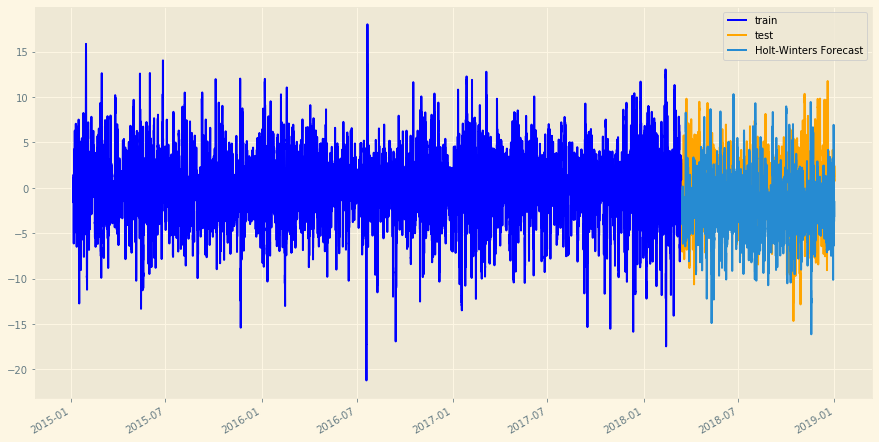

In [14]:
f, ax = plt.subplots(figsize = (15,8))

timeseries_plot(train.temp_deseasoned1, color = 'blue', ax=ax, label = 'train')
timeseries_plot(test.temp_deseasoned1, color = 'orange', ax = ax, legend = True,label = 'test')

ax.plot(test.index, pred, label = 'Holt-Winters Forecast')

ax.legend()

**Return seasonality to deseasoned tempt

In [15]:
hw_results = test[['temp','temp_deseasoned1']]

In [16]:
hw_results['hw_pred_deseasoned'] = pred

In [17]:
#Add deasoning by reversing diff(24)
hw_results['temp_predictions'] = hw_results.hw_pred_deseasoned + (hw_results.temp - hw_results.temp_deseasoned1)

hw_results.head()

,temp,temp_deseasoned1,hw_pred_deseasoned,temp_predictions
date_time,,,,
2018-03-15 19:00:00,56.0552,-1.5156,-0.502801,57.067999
2018-03-15 20:00:00,53.9708,-2.6028,-0.908736,55.664864
2018-03-15 21:00:00,52.8116,-2.9016,-1.570002,54.143198
2018-03-15 22:00:00,51.7064,-3.4524,-1.492398,53.666402
2018-03-15 23:00:00,50.5508,-4.1472,-1.710769,52.987231


In [18]:
results = model_performance(hw_results.temp_predictions,hw_results.temp)
results

{'MSE': 21.310798176527175,
 'RMSE': 4.616362006659267,
 'MAE': 3.656055243863275}

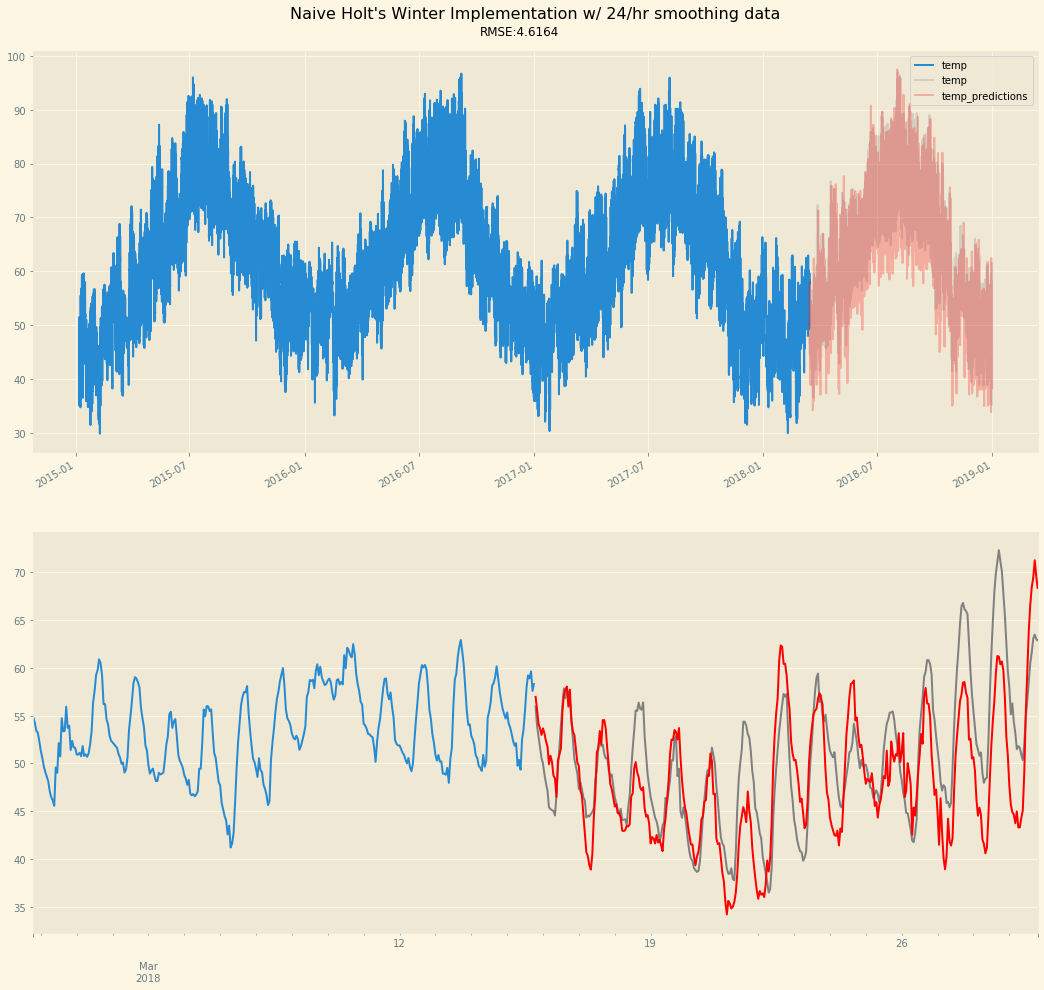

In [19]:
f,ax = plt.subplots(2,1,figsize = (18,18))

timeseries_plot(train.temp[:], ax=ax[0])
timeseries_plot(hw_results.temp[:],alpha=.25,color = 'grey', ax=ax[0])
timeseries_plot(hw_results.temp_predictions[:],color = 'r', alpha=.25, ax=ax[0])

timeseries_plot(train.temp[-24*7*2:], ax=ax[1])
timeseries_plot(hw_results.temp[:24*7*2],color = 'grey', ax=ax[1])
timeseries_plot(hw_results.temp_predictions[:24*7*2],color = 'r', ax=ax[1])

ax[0].set_title('Naive Holt\'s Winter Implementation w/ 24/hr smoothing data', pad = 33)
f.suptitle('RMSE:{}'.format(round(results['RMSE'],4)), y=.9)
ax[0].legend()

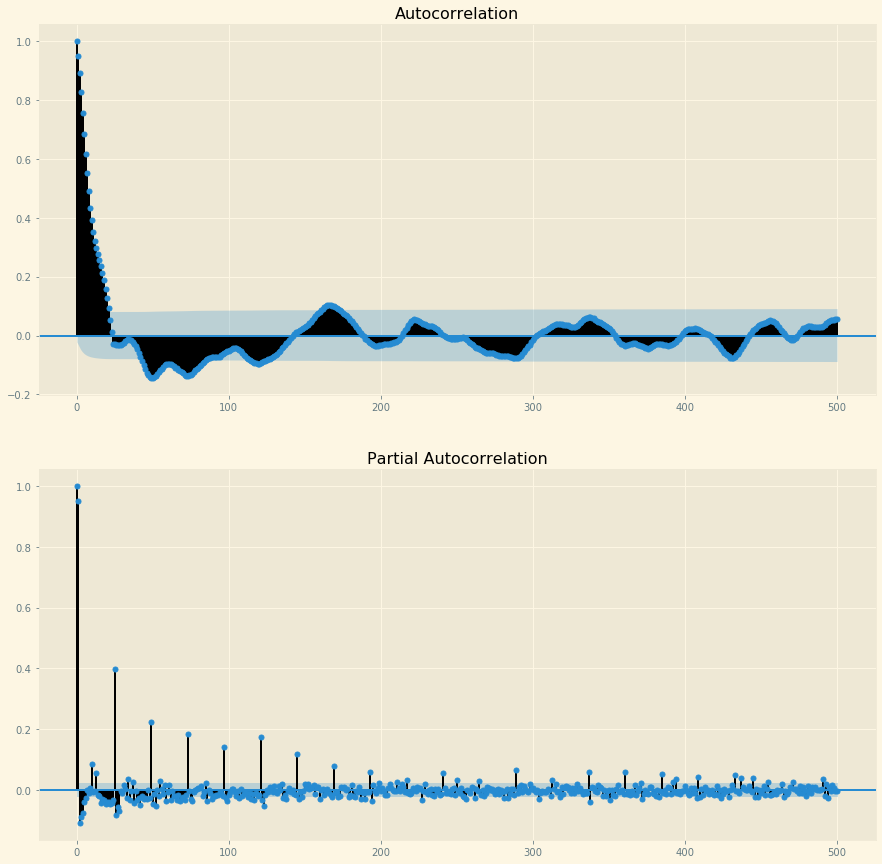

In [20]:
#Import plot acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Set plot
f, ax = plt.subplots(2,1,figsize = (15,15))


#Fit to data
plot_acf(pred, lags = 500, ax = ax[0])
plot_pacf(pred, lags = 500, ax = ax[1]);
###Set plot aesthetics###
#Title


## ARMA

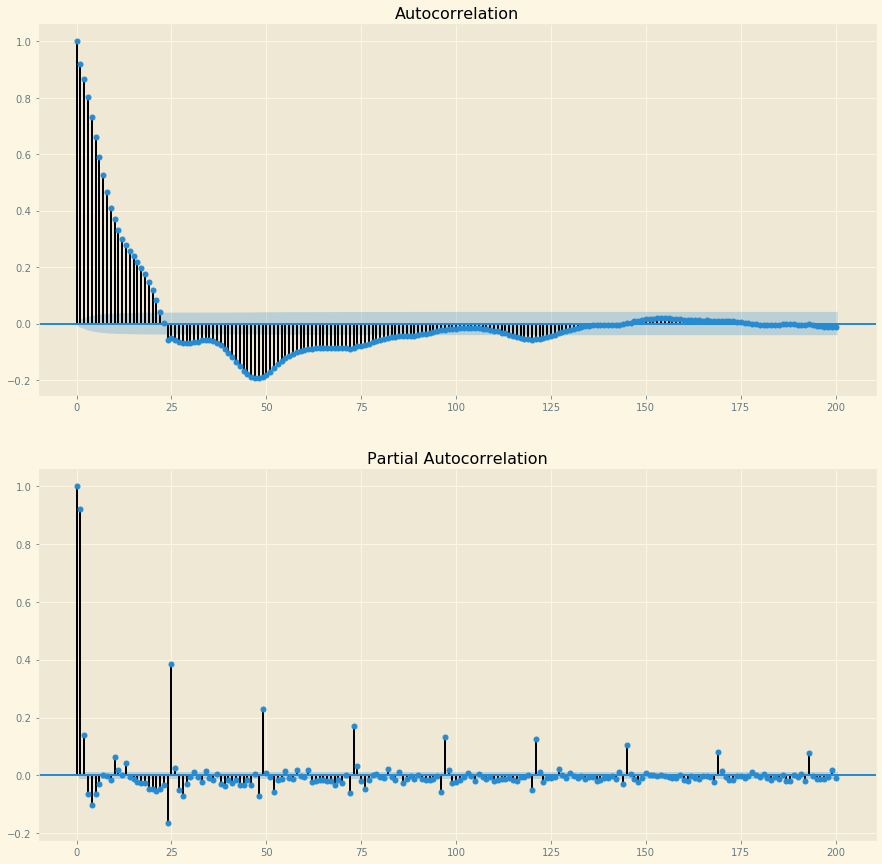

In [21]:
#Import plot acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Set plot
f, ax = plt.subplots(2,1,figsize = (15,15))


#Fit to data
plot_acf(train.temp_deseasoned1, lags = 200, ax = ax[0])
plot_pacf(train.temp_deseasoned1, lags = 200, ax = ax[1]);

In [35]:
#Import ARMA model
from statsmodels.tsa.arima_model import ARMA
#pacf = 5, acf = 20
#Fit model to deseasoned temp data
arma = ARMA(train.temp_deseasoned1.values[24:], order = (5,0)).fit()

In [36]:
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                27938
Model:                     ARMA(4, 0)   Log Likelihood              -47083.163
Method:                       css-mle   S.D. of innovations              1.305
Date:                Sat, 16 May 2020   AIC                          94178.325
Time:                        18:40:40   BIC                          94227.752
Sample:                             0   HQIC                         94194.238
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0109      0.096      0.114      0.909      -0.176       0.198
ar.L1.y        0.7941      0.006    133.422      0.000       0.782       0.806
ar.L2.y        0.2092      0.008     27.473      0.000       0.194       0.224
ar.L3.y        0.0167      0.008      2.191      0.028       0.002       0.032
ar.L4.y       -0.1017      0.006    -17.089      0.000      -0.113      -0.090
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4418           -1.5843j            2.1422           -0.3675
AR.2           -1.4418           +1.5843j            2.1422            0.3675
AR.3            1.1001           -0.0000j            1.1001           -0.0000
AR.4            1.9476           -0.0000j            1.9476           -0.0000
-----------------------------------------------------------------------------
"""

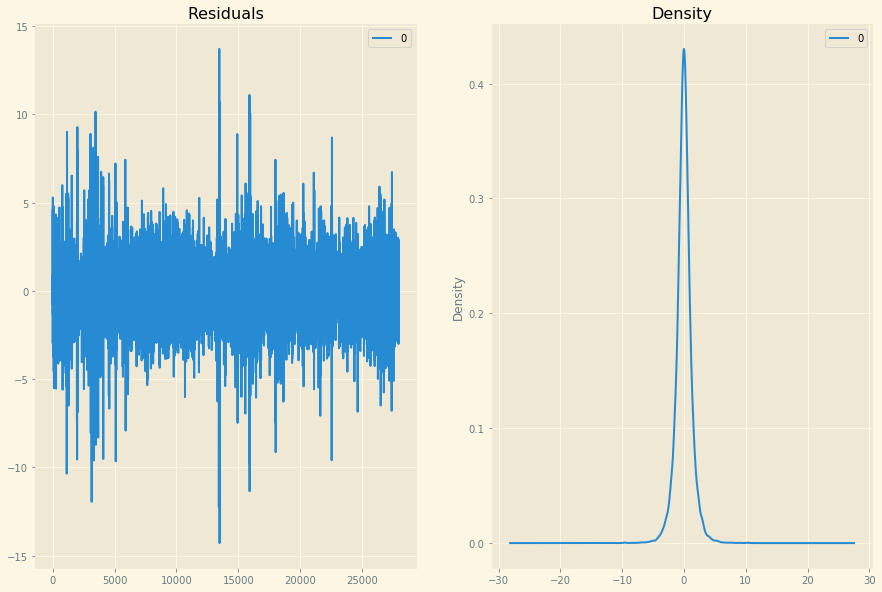

In [37]:
residuals = pd.DataFrame(arma.resid)

fig, ax = plt.subplots(1,2, figsize = (15,10))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


In [38]:
residuals.shape

(27938, 1)

In [39]:
train.temp_deseasoned1.shape

(27962,)

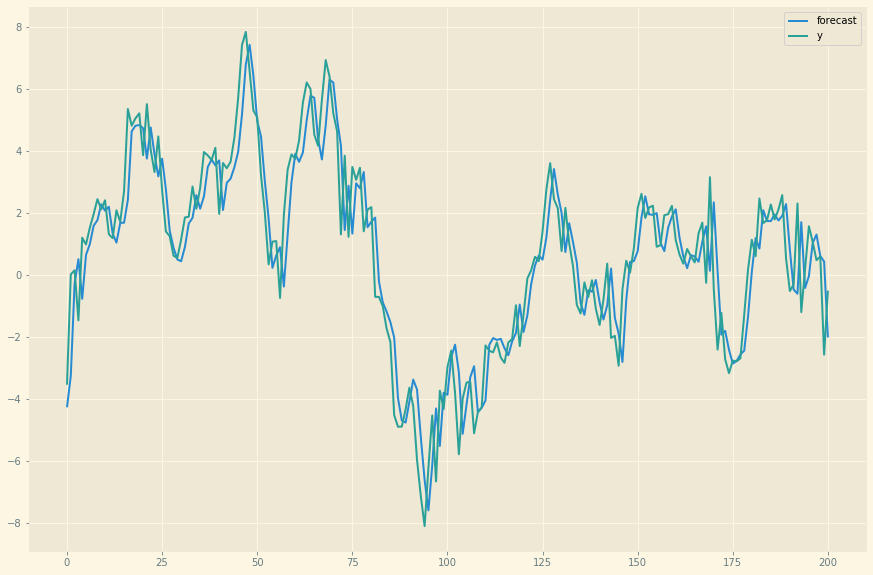

In [40]:
#Set PLot
fig, ax = plt.subplots(figsize = (15,10))

#Plot ARMA fit to last 200 samples
arma.plot_predict(start = 27737, end = 27937, ax= ax);

###Set plot aesthetics###



**Forecast with ARMA Model**

In [41]:
#Create Forecast
forecast,err, conf = arma.forecast(len(test))

#Create empty df
arma_results = pd.DataFrame(index=test.index)

#Store forecast, err, and conf into df
arma_results['forecast']= pd.Series(forecast, index=test.index)
arma_results['error'] = err
arma_results['lower_conf'] = conf[:,0]
arma_results['upper_conf'] = conf[:,1]

#Reverse differencing on forecast
arma_results['forecast_transformed'] = arma_results['forecast'] + (test.temp - test.temp_deseasoned1)

#Check
arma_results.head()

,forecast,error,lower_conf,upper_conf,forecast_transformed
date_time,,,,,
2018-03-15 19:00:00,-0.978860,1.305126,-3.536860,1.579140,56.591940
2018-03-15 20:00:00,-0.986468,1.666566,-4.252878,2.279942,55.587132
2018-03-15 21:00:00,-0.733912,1.994678,-4.643409,3.175585,54.979288
2018-03-15 22:00:00,-0.752996,2.282220,-5.226066,3.720074,54.405804
2018-03-15 23:00:00,-0.667504,2.489477,-5.546790,4.211782,54.030496


Metrics

In [42]:
results = model_performance(arma_results['forecast_transformed'], test['temp'])
print(results)

{'MSE': 8.572873427791068, 'RMSE': 2.927946964647937, 'MAE': 2.185544221946362}


Visualize plot

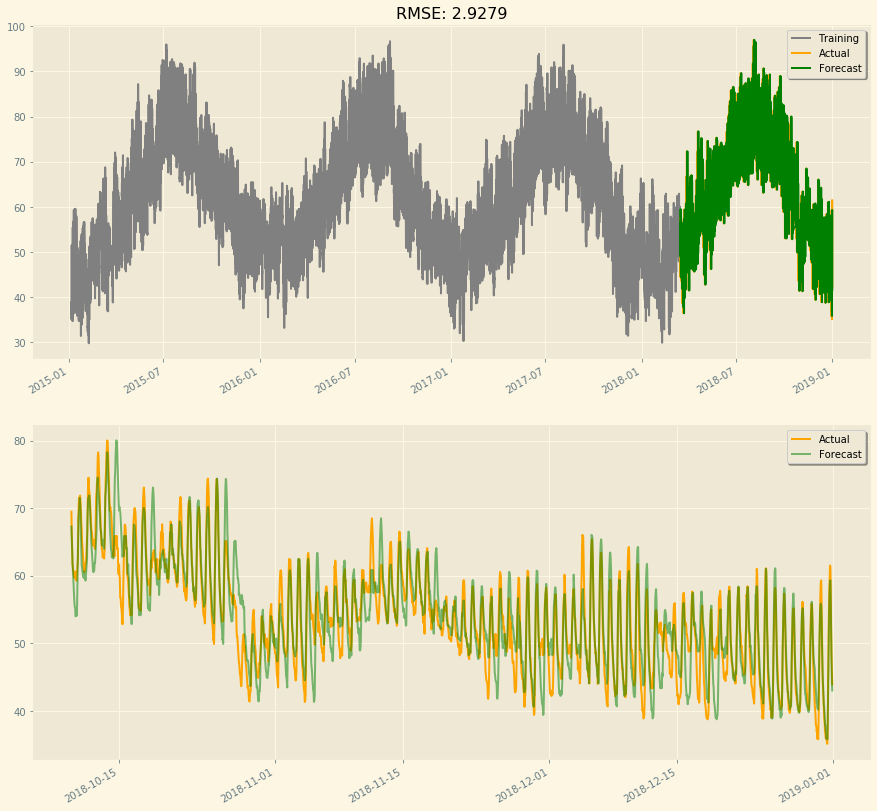

In [43]:
#Set PLot
fig, ax = plt.subplots(2,1, figsize = (15,15))

#Plot data with forecast
timeseries_plot(train.temp, color = 'gray', ax=ax[0], label = 'Training')
timeseries_plot(test.temp, color = 'orange', ax = ax[0], label = 'Actual')
timeseries_plot(arma_results.forecast_transformed, color = 'g', 
                title='RMSE: {}'.format(round(results['RMSE'],4)),ax = ax[0],legend=True, label = 'Forecast')

timeseries_plot(test.temp[-2000:-1], color = 'orange', ax = ax[1], label = 'Actual')
timeseries_plot(arma_results.forecast_transformed[-2000:-1], color = 'g', alpha = .5,
                title='',ax = ax[1],legend=True, label = 'Forecast')